In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import tensorflow as tf

In [35]:
import ast


def string_to_list(string):
    return ast.literal_eval(string)

In [36]:
# todo: tirar o dataframe e receber apenas a instancia
def show_image_with_explanation(
    df: pd.DataFrame, instancia_index: int, explanation: list
):
    instancia_values = df.iloc[instancia_index, :-1].values

    instancia = instancia_values.reshape(8, 8)

    fig, ax = plt.subplots()

    ax.imshow(instancia, cmap="gray")

    target = df.iloc[instancia_index, -1]
    # Adicionar texto com o alvo
    ax.text(
        0.5, -0.1, 
        f"Target: {target}", 
        fontsize=12, 
        ha="center", 
        transform=ax.transAxes
    )

    if explanation:
        coordinates_explanation = explanation

        for x, y in coordinates_explanation:
            x = x - 0.5  # deslocar para alinhar
            y = y - 0.5
            width = height = 1

            rect = patches.Rectangle(
                (x, y), width, height, linewidth=1, edgecolor="r", facecolor="none"
            )
            ax.add_patch(rect)

    plt.show()

In [37]:
def read_dataset(dir_path, model_h5): 
  data_test = pd.read_csv(f"{dir_path}/test.csv")
  data_train = pd.read_csv(f"{dir_path}/train.csv")
  data = data_train._append(data_test)
  model_h5 = tf.keras.models.load_model(f"{dir_path}/{model_h5}")
  return (data, model_h5)

In [38]:
path = "datasets\digits"
model_file = "models\model_4layers_20neurons.h5"

In [39]:
(data, model_h5) = read_dataset(path, model_file)

In [40]:
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.000,0.5000,1.0000,1.0000,0.7500,0.0000,0.000000,0.0,0.0000,...,0.0,0.0,0.000000,0.4375,1.0000,1.000,0.4375,0.0000,0.0,3.0
1,0.0,0.000,0.2500,0.7500,1.0000,0.7500,0.0000,0.000000,0.0,0.3125,...,0.0,0.0,0.000000,0.1250,0.8125,1.000,0.9375,0.1875,0.0,9.0
2,0.0,0.000,0.0000,0.8125,0.9375,0.5000,0.0000,0.000000,0.0,0.0000,...,0.0,0.0,0.000000,0.0625,0.8125,1.000,0.2500,0.0000,0.0,1.0
3,0.0,0.125,0.5625,0.9375,1.0000,0.5625,0.0000,0.000000,0.0,0.3750,...,0.0,0.0,0.000000,0.5625,1.0000,1.000,0.6250,0.0000,0.0,3.0
4,0.0,0.000,0.0000,0.8750,0.5625,0.0000,0.0000,0.000000,0.0,0.0000,...,0.0,0.0,0.000000,0.0000,0.8750,0.750,0.0000,0.0000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,0.000,0.0000,0.6250,0.5625,0.0000,0.0000,0.000000,0.0,0.0000,...,0.0,0.0,0.000000,0.0000,0.7500,0.750,0.0000,0.0000,0.0,4.0
356,0.0,0.000,0.5625,0.8125,0.6875,0.0625,0.0000,0.000000,0.0,0.0000,...,0.0,0.0,0.000000,0.5000,0.8750,0.625,0.0625,0.0000,0.0,0.0
357,0.0,0.000,0.1875,0.6875,0.0000,0.0000,0.0000,0.000000,0.0,0.0000,...,0.0,0.0,0.000000,0.3125,0.6250,0.750,0.9375,0.4375,0.0,6.0
358,0.0,0.250,0.6250,0.7500,1.0000,0.5000,0.0000,0.000000,0.0,0.2500,...,0.0,0.0,0.222222,0.8750,1.0000,0.750,0.5625,0.0000,0.0,3.0


In [41]:
result_df = pd.read_csv(f"resultados\{path}\{model_file}\df.csv")
result_df.head()

,instance_index,tempo_original,tempo_relaxado,tempo_relaxado_global,len_original,len_relaxado,len_relaxado_global,delta,explanation,explanation_relaxed,explanation_relaxed_global
0,0,560.191276,1.104342,1.229002,42,28,28,0.901,"[(0, 4), (1, 0), (1, 3), (1, 4), (1, 5), (1, 7...","[(1, 2), (1, 4), (1, 5), (2, 4), (3, 3), (3, 4...","[(1, 2), (1, 4), (1, 5), (2, 3), (2, 4), (3, 3..."
1,1,118.225737,1.117779,1.372470,46,36,38,0.901,"[(0, 6), (1, 0), (1, 3), (1, 5), (1, 7), (2, 0...","[(0, 5), (1, 2), (1, 4), (1, 5), (1, 6), (2, 1...","[(0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6..."
2,2,87.164941,1.146909,1.230689,49,26,20,0.901,"[(0, 5), (0, 6), (1, 1), (1, 2), (1, 3), (1, 4...","[(2, 5), (2, 6), (3, 2), (3, 3), (3, 4), (3, 5...","[(2, 4), (3, 3), (3, 4), (3, 7), (4, 2), (4, 3..."
3,3,377.431908,1.119091,1.151551,44,32,31,0.901,"[(1, 0), (1, 3), (1, 6), (1, 7), (2, 1), (2, 2...","[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3...","[(1, 0), (1, 1), (1, 2), (1, 3), (1, 5), (2, 3..."
4,4,168.731994,1.055553,0.996742,49,16,17,0.901,"[(0, 2), (0, 4), (0, 6), (0, 7), (1, 0), (1, 1...","[(2, 4), (2, 5), (3, 3), (3, 4), (4, 3), (4, 4...","[(2, 4), (2, 5), (3, 3), (3, 4), (4, 3), (4, 4..."


In [42]:
coluna = 'len_relaxado'
resultados_filtrados = result_df.loc[result_df[coluna] != 64]
resultados_filtrados.head()

,instance_index,tempo_original,tempo_relaxado,tempo_relaxado_global,len_original,len_relaxado,len_relaxado_global,delta,explanation,explanation_relaxed,explanation_relaxed_global
0,0,560.191276,1.104342,1.229002,42,28,28,0.901,"[(0, 4), (1, 0), (1, 3), (1, 4), (1, 5), (1, 7...","[(1, 2), (1, 4), (1, 5), (2, 4), (3, 3), (3, 4...","[(1, 2), (1, 4), (1, 5), (2, 3), (2, 4), (3, 3..."
1,1,118.225737,1.117779,1.372470,46,36,38,0.901,"[(0, 6), (1, 0), (1, 3), (1, 5), (1, 7), (2, 0...","[(0, 5), (1, 2), (1, 4), (1, 5), (1, 6), (2, 1...","[(0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6..."
2,2,87.164941,1.146909,1.230689,49,26,20,0.901,"[(0, 5), (0, 6), (1, 1), (1, 2), (1, 3), (1, 4...","[(2, 5), (2, 6), (3, 2), (3, 3), (3, 4), (3, 5...","[(2, 4), (3, 3), (3, 4), (3, 7), (4, 2), (4, 3..."
3,3,377.431908,1.119091,1.151551,44,32,31,0.901,"[(1, 0), (1, 3), (1, 6), (1, 7), (2, 1), (2, 2...","[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3...","[(1, 0), (1, 1), (1, 2), (1, 3), (1, 5), (2, 3..."
4,4,168.731994,1.055553,0.996742,49,16,17,0.901,"[(0, 2), (0, 4), (0, 6), (0, 7), (1, 0), (1, 1...","[(2, 4), (2, 5), (3, 3), (3, 4), (4, 3), (4, 4...","[(2, 4), (2, 5), (3, 3), (3, 4), (4, 3), (4, 4..."


In [48]:
index = 1

## Original

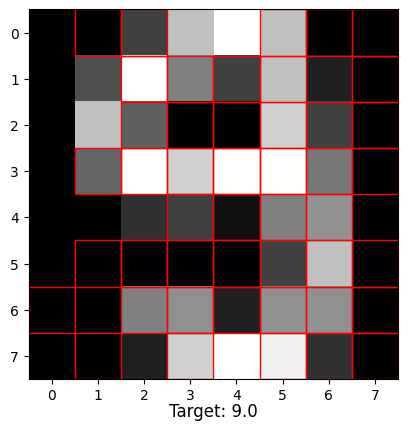

In [49]:
show_image_with_explanation(
  data, 
  index, 
  string_to_list(result_df.iloc[index]["explanation"]))

## Relaxado local

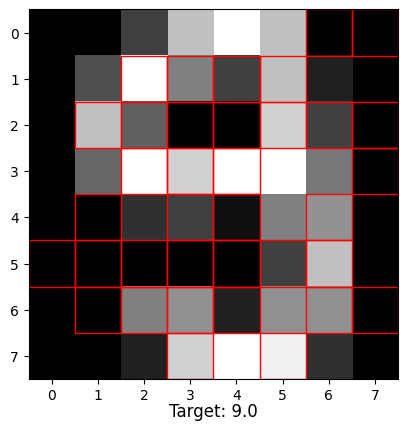

In [50]:
show_image_with_explanation(
  data, 
  index, 
  string_to_list(result_df.iloc[index]["explanation_relaxed"]))

## Relaxado global

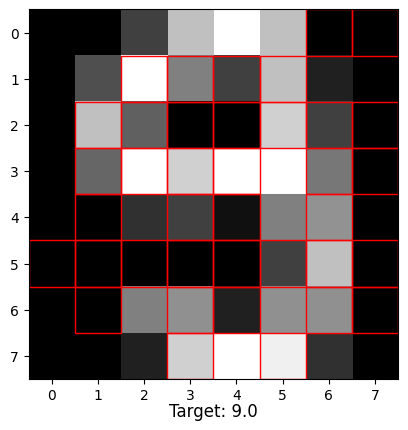

In [51]:
show_image_with_explanation(
  data, 
  index, 
  string_to_list(result_df.iloc[index]["explanation_relaxed_global"]))